In [3]:
from google.colab import files
upload = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [6]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
train_set = data_train.iloc[:,1:2].values
train_set.shape

(1258, 1)

In [8]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
#create a data structure with 60 timestaps and 1 output
#means we put 60 records in x_train and get 61 record on y_train behalf of last 60 records. LSTM SAVE 60 RECORDS in own memory(x_train) and 61(y_train) record in memory 
#and understand on what pattern it get 61 record
#ham ek tred janana chahate h 

x_train = []
y_train = []

for i in range(60,1258):

  x_train.append(train_set[i-60:i,0])  #(row , columns) -->i=60 (60-60:60,0)-->(0:60 ,0)
  y_train.append(train_set[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

  

In [10]:
x_train.shape

(1198, 60)

In [0]:
#reshaping
#total no of stock price (jo training k liye istemaal krohe) , x_train(j0 60 value li thi) , y_train(jo 61 value aai thi 60 value k behalf pe)
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1],1))

In [12]:
x_train.shape

(1198, 60, 1)

In [13]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units=50 , return_sequences=True , input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))



In [0]:
regressor.add(Dense(units =1))


In [0]:
regressor.compile(optimizer='adam' , loss='mean_squared_error')

In [22]:
regressor.fit(x_train , y_train , epochs=100 , batch_size=32)


Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0435
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0074
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - l

In [23]:
 from google.colab import files
 upload = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [46]:
data_test = pd.read_csv("Google_Stock_Price_Test.csv")
data_test.shape

(20, 6)

In [47]:
test_set = data_test.iloc[: , 1:2].values
test_set.shape

(20, 1)

In [0]:
dataset_total = pd.concat((data_train['Open'] , data_test['Open']) , axis= 0)


In [70]:
inputs = dataset_total[len(dataset_total) - len(data_test)-60:].values
inputs.shape

(80,)

In [72]:


inputs = inputs.reshape(-1,1)

inputs.shape


(80, 1)

In [73]:


inputs = sc.transform(inputs)
inputs.shape



(80, 1)

In [76]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test.shape



(20, 60)

In [77]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [0]:
predicted_price = regressor.predict(x_test)

In [79]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[783.8617 ],
       [781.1629 ],
       [782.31213],
       [783.76416],
       [787.0268 ],
       [792.7847 ],
       [797.11755],
       [797.83105],
       [797.69995],
       [797.79736],
       [798.12415],
       [798.29175],
       [798.41437],
       [799.2977 ],
       [800.38885],
       [805.8025 ],
       [812.6575 ],
       [819.13513],
       [821.3139 ],
       [814.97845]], dtype=float32)

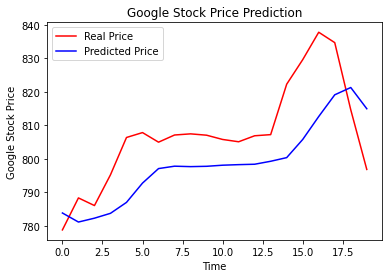

In [81]:
plt.plot(test_set,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()